### **SISTEMA INTELIGENTE DE SCORING CREDITICIO CON REDES NEURONALES PROFUNDAS**

#### <strong><font color="green">🎯 Objetivo</font></strong>

Diseñar, entrenar y evaluar un modelo de red neuronal profunda para predecir la probabilidad de impago de clientes bancarios, utilizando un conjunto de datos realista. El modelo debe ser explicable, eficiente y presentar resultados interpretables para su uso en contextos financieros.

#### <strong><font color="green">Entorno de ejecución.</font></strong>

Para este proyecto se utilizará el entorno de ejecución de Jupyter Notebook. La versión de python es la 3.12.10 con las siguientes librerías:

- numpy==1.26.4
- pandas==2.2.2
- scipy==1.11.4
- matplotlib==3.9.2
- seaborn==0.13.2
- plotly==5.24.1
- scikit-learn==1.7.1
- shap==0.48.0
- imblearn==0.0
- tensorflow==2.19.0

In [1]:
# Se importan las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import funciones as f
import random

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers, callbacks

import shap

import warnings
warnings.filterwarnings("ignore")

C:\Users\Jose\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Configuración de visualización
plt.style.use('ggplot')
sns.set_palette("husl")

In [3]:
# Reproducibilidad
SEED = 42                   # Fija la semilla para garantizar reproducibilidad en resultados aleatorios
random.seed(SEED)           # Establece la semilla para la generación de números aleatorios en Python
np.random.seed(SEED)        # Establece la semilla para la generación de números aleatorios en NumPy
tf.random.set_seed(SEED)    # Establece la semilla para la generación de números aleatorios en TensorFlow

#### <strong><font color="green">1. Carga y análisis de datos</font></strong>

In [4]:
# Carga el dataset
df = pd.read_csv("german_credit_data.csv")

##### <strong><font color="DarkSeaGreen">🔸Exploración de datos</font></strong>

📌 **Descripción de variables**

- `status:` Estado de la cuenta corriente existente (codificado en categorías).
- `duration:` Duración del crédito en meses.
- `credit_history:` Historial de crédito del cliente (pago puntual, retrasos, créditos previos).
- `purpose:` Propósito del crédito (ejemplo: coche, electrodomésticos, educación, etc.).
- `amount:` Monto del crédito solicitado (en marcos alemanes).
- `savings:` Cantidad de ahorros del cliente (codificado en categorías).
- `employment_duration:` Tiempo de empleo actual (en categorías de años).
- `installment_rate:` Tasa de cuota en relación al ingreso disponible (%).
- `personal_status_sex:` Estado civil y género del cliente (codificado).
- `other_debtors:` Otros deudores o garantes asociados.
- `present_residence:` Tiempo de residencia actual (en años).
- `property:` Tipo de propiedad poseída (ejemplo: bienes raíces, seguro, etc.).
- `age:` Edad del cliente (en años).
- `other_installment_plans:` Otros planes de pago a plazos (ejemplo: banco, tienda).
- `housing:` Tipo de vivienda (propia, alquilada, libre).
- `number_credits:` Número de créditos existentes en el banco.
- `job:` Tipo de empleo (codificado en niveles de estabilidad/posición).
- `people_liable:` Número de personas a cargo económicamente.
- `telephone:` Disponibilidad de teléfono (1 = sí, 0 = no).
- `foreign_worker:` Condición de trabajador extranjero (1 = sí, 0 = no).
- `credit_risk:` Variable objetivo. Indica la calidad del crédito (1 = buen cliente, 0 = cliente riesgoso).

---

📋 **Clasificación de variables**

| Variable                   | Tipo        | Escala              | Descripción breve |
|-----------------------------|------------|---------------------|------------------|
| **status**                  | Categórica | Ordinal             | Estado de la cuenta corriente |
| **duration**                | Numérica   | Continua            | Duración del crédito (meses) |
| **credit_history**          | Categórica | Nominal             | Historial de crédito |
| **purpose**                 | Categórica | Nominal             | Propósito del crédito |
| **amount**                  | Numérica   | Continua            | Monto del crédito |
| **savings**                 | Categórica | Ordinal             | Nivel de ahorros |
| **employment_duration**     | Categórica | Ordinal             | Tiempo en el empleo actual |
| **installment_rate**        | Categórica | Ordinal             | Tasa de cuota (%) |
| **personal_status_sex**     | Categórica | Nominal             | Estado civil y sexo |
| **other_debtors**           | Categórica | Nominal             | Otros deudores/garantes |
| **present_residence**       | Categórica | Ordinal             | Tiempo de residencia actual |
| **property**                | Categórica | Nominal             | Tipo de propiedad |
| **age**                     | Numérica   | Continua            | Edad (años) |
| **other_installment_plans** | Categórica | Nominal             | Otros planes de pago |
| **housing**                 | Categórica | Nominal             | Tipo de vivienda |
| **number_credits**          | Categórica | Ordinal             | Número de créditos en el banco |
| **job**                     | Categórica | Nominal             | Tipo de empleo |
| **people_liable**           | Categórica | Ordinal             | Personas a cargo |
| **telephone**               | Categórica | Nominal             | Disponibilidad de teléfono |
| **foreign_worker**          | Categórica | Nominal             | Condición de trabajador extranjero |
| **credit_risk**             | Categórica | Binaria (objetivo)  | Riesgo de crédito (1 = bueno, 0 = malo) |

In [5]:
# Inspección inicial de los datos
print("🔹 Primeras filas del dataset:")
df.head()

🔹 Primeras filas del dataset:


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [6]:
# Ver información general del dataset
print("🔹 Información general del dataset:\n")
df.info()

🔹 Información general del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing              

In [7]:
# Visualización de dimensiones del dataset
print("🔹 Dimensiones:", df.shape)     # Resultado (filas, columnas)

🔹 Dimensiones: (1000, 21)


In [8]:
# Estadísticas descriptivas
print("🔹 Estadísticas descriptivas de variables numéricas:")
df.describe()

🔹 Estadísticas descriptivas de variables numéricas:


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,...,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


In [9]:
# Análisis calidad de datos
analysis_result = f.data_quality_analysis(df).set_index('Columna')
print("🔹 Análisis de la calidad de los datos:\n")
print(analysis_result.sort_values('Tipo de dato'))

🔹 Análisis de la calidad de los datos:

                        Tipo de dato  Valores únicos  Valores nulos  % nulos
Columna                                                                     
status                         int64               4              0      0.0
telephone                      int64               2              0      0.0
people_liable                  int64               2              0      0.0
job                            int64               4              0      0.0
number_credits                 int64               4              0      0.0
housing                        int64               3              0      0.0
other_installment_plans        int64               3              0      0.0
age                            int64              53              0      0.0
property                       int64               4              0      0.0
foreign_worker                 int64               2              0      0.0
present_residence              int64

In [10]:
# Distribución de la variable objetivo
print("🔹 Distribución de la variable objetivo (credit_risk):\n")
print(df['credit_risk'].value_counts(normalize = True))

🔹 Distribución de la variable objetivo (credit_risk):

credit_risk
1    0.7
0    0.3
Name: proportion, dtype: float64


In [11]:
# Variables categóricas (ordinales y nominales)
categorical_vars = [
    "status",                   # Ordinal
    "credit_history",           # Nominal
    "purpose",                  # Nominal
    "savings",                  # Ordinal
    "employment_duration",      # Ordinal
    "installment_rate",         # Ordinal
    "personal_status_sex",      # Nominal
    "other_debtors",            # Nominal
    "present_residence",        # Ordinal
    "property",                 # Nominal
    "other_installment_plans",  # Nominal
    "housing",                  # Nominal
    "number_credits",           # Ordinal
    "job",                      # Nominal
    "people_liable",            # Ordinal
    "telephone",                # Nominal
    "foreign_worker"            # Nominal
]

# Variables numéricas
numeric_vars = [
    "duration",     # Duración del crédito en meses
    "amount",       # Monto del crédito
    "age"           # Edad del cliente
]

# Columna objetivo
TARGET = "credit_risk"   # 1 = buen cliente, 0 = cliente riesgoso

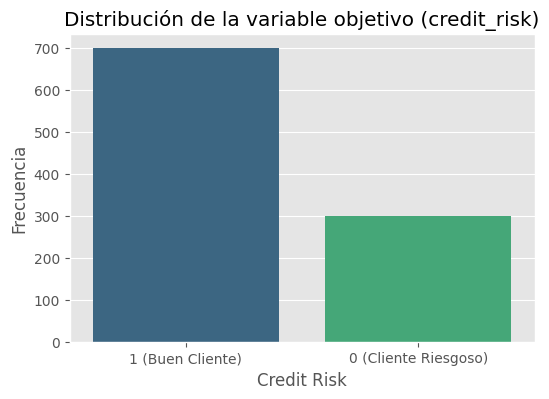

In [12]:
# Crear un mapeo de etiquetas
label_map = {0: "0 (Cliente Riesgoso)", 1: "1 (Buen Cliente)"}

plt.figure(figsize = (6, 4))
sns.countplot(
    x = "credit_risk",
    data = df.replace({"credit_risk": label_map}),
    palette = "viridis"
)

plt.title("Distribución de la variable objetivo (credit_risk)")
plt.xlabel("Credit Risk")
plt.ylabel("Frecuencia")
plt.show()

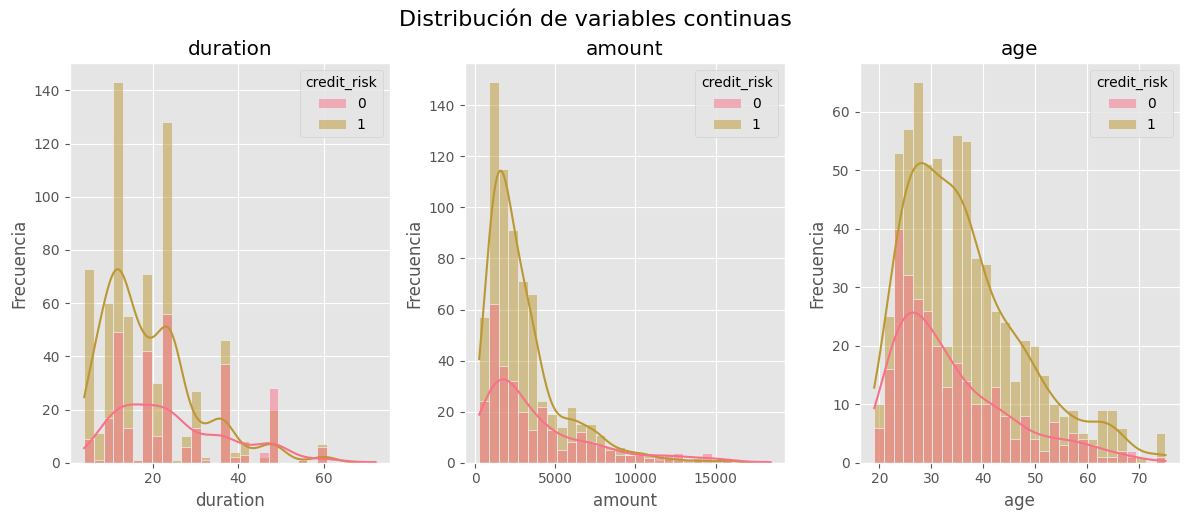

In [13]:
# Histograma para cada variable predictora numérica
plt.figure(figsize = (12, 5))
for i, col in enumerate(numeric_vars, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data = df, x = col, kde = True, bins = 30, color = 'skyblue', hue = 'credit_risk')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)

plt.tight_layout()
plt.suptitle("Distribución de variables continuas", fontsize = 16, y = 1.03)
plt.show()

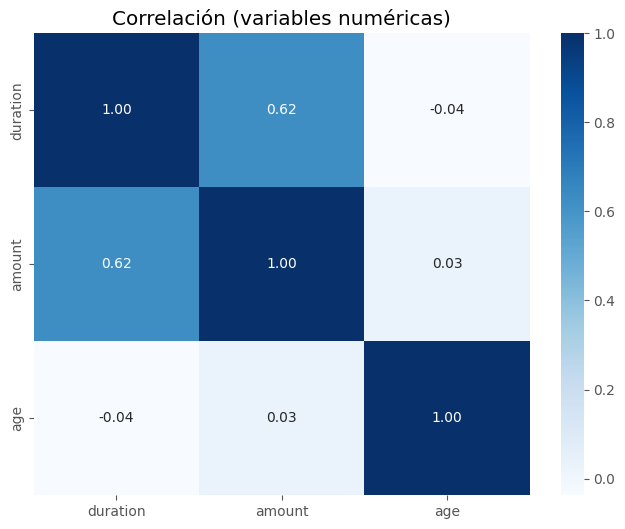

In [14]:
# Matriz de correlación sobre numéricas
plt.figure(figsize = (8, 6))
sns.heatmap(df[numeric_vars].corr(), annot = True, cmap = "Blues", fmt = ".2f")
plt.title("Correlación (variables numéricas)")
plt.show()

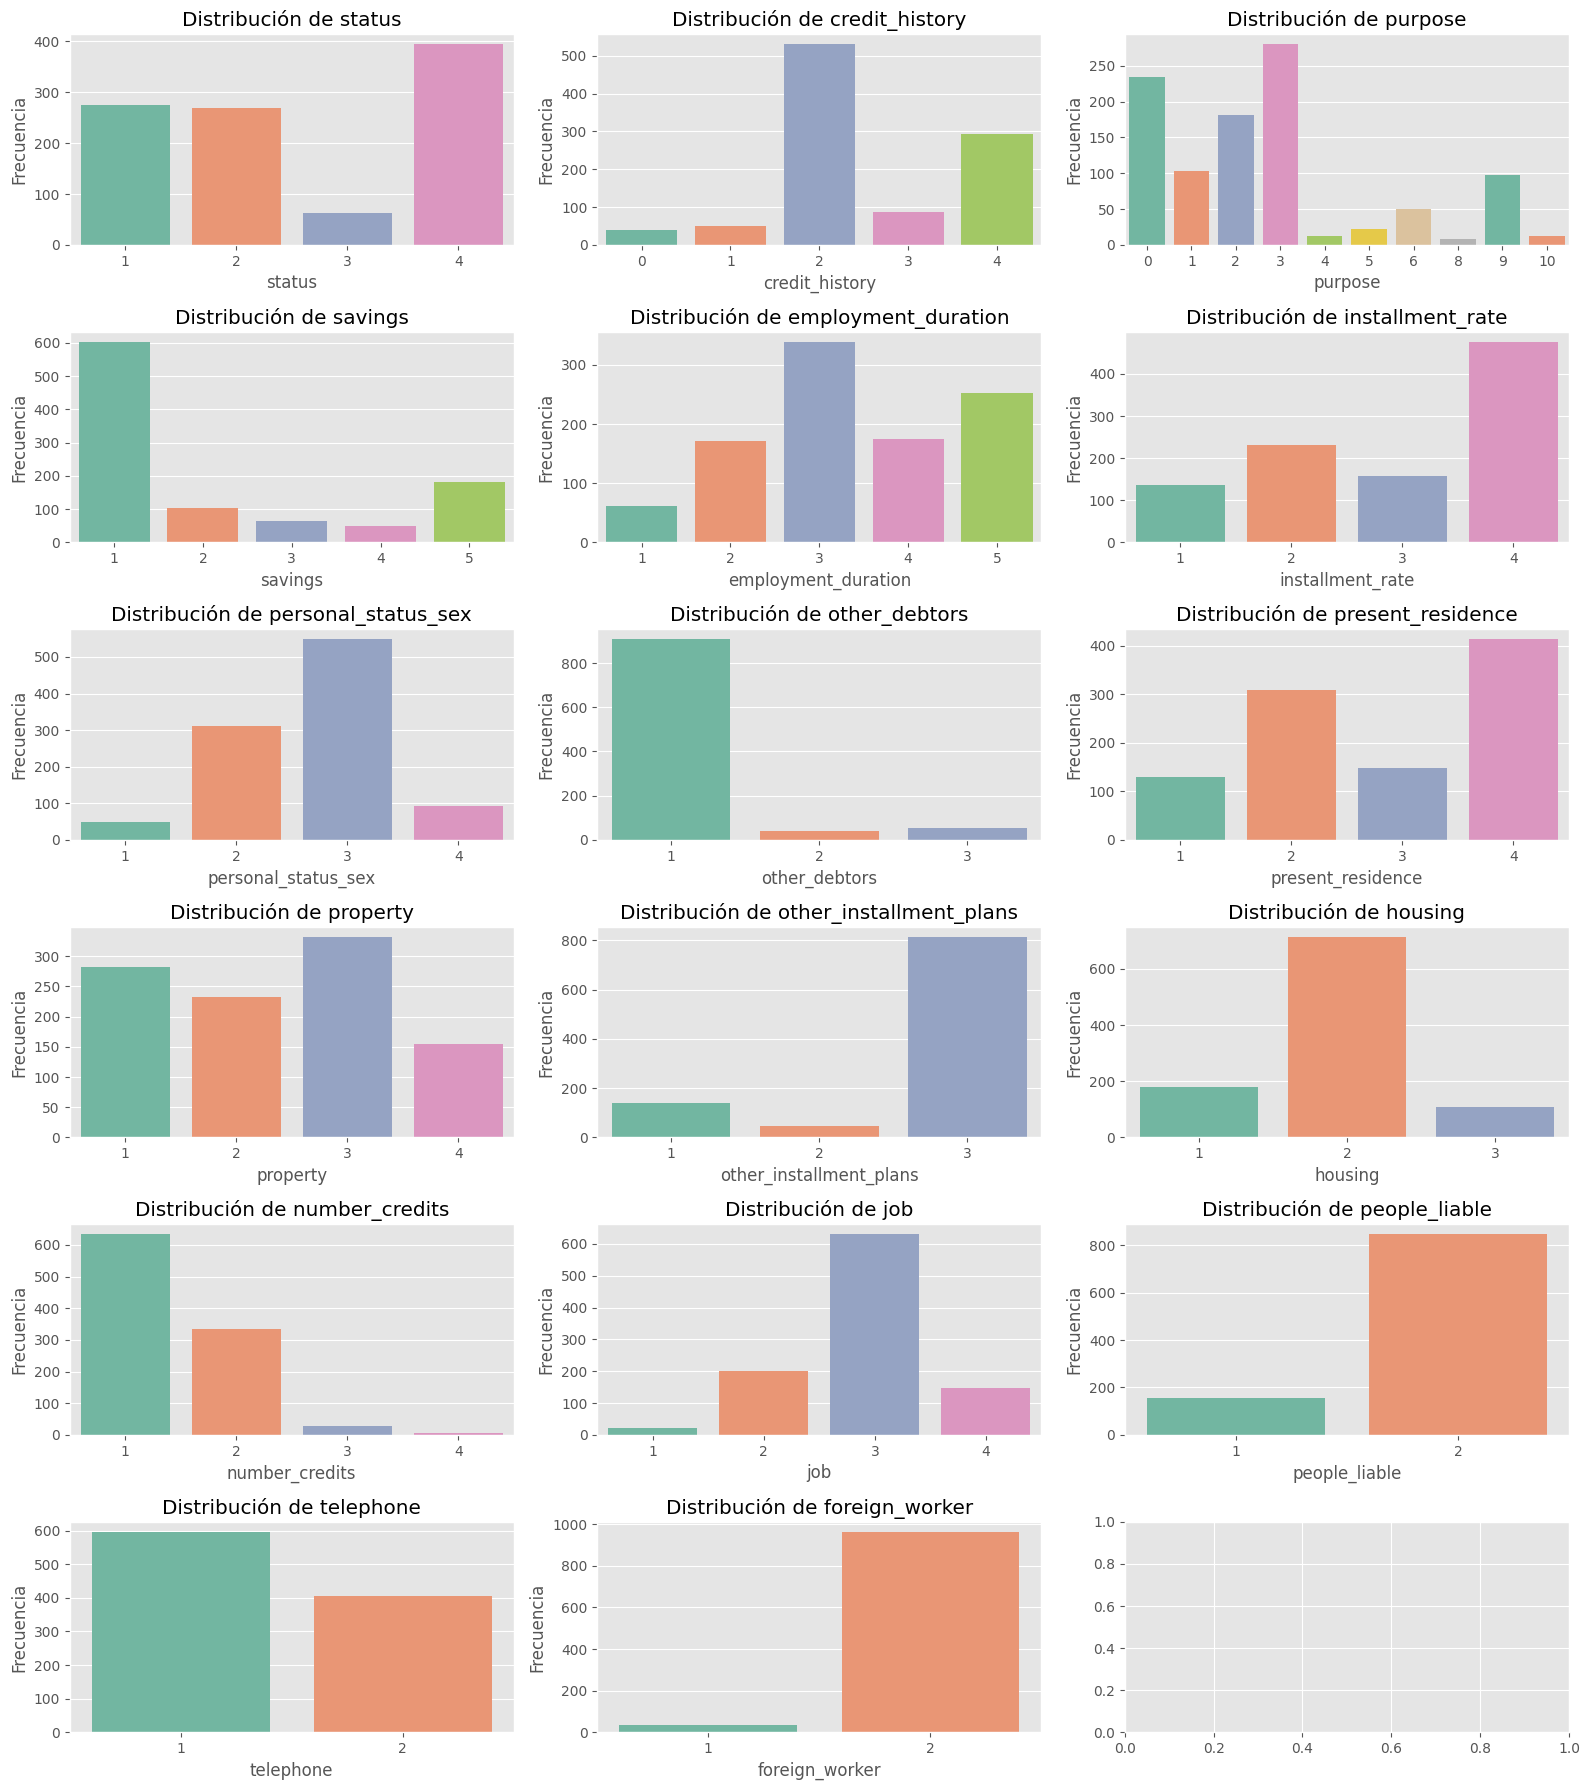

In [15]:
# Distribución de variables categóricas
fig, axes = plt.subplots(len(categorical_vars)//3 + 1, 3, figsize = (16, 18))
axes = axes.flatten()

for i, col in enumerate(categorical_vars):
    sns.countplot(x = col, data = df, ax = axes[i], palette = "Set2")
    axes[i].set_title(f"Distribución de {col}")
    axes[i].set_ylabel("Frecuencia")

# Ajustar espacios
plt.tight_layout()
plt.show()

📊 **Análisis Exploratorio de Datos - German Credit Data**

**1. Distribución de la variable objetivo (*credit_risk*)**

- La variable está **desbalanceada**: alrededor del **70% de los clientes son buenos pagadores (Buen Cliente)** y el **30% son clientes riesgosos**.
  
- Esto implica que, en modelos de predicción, será necesario considerar técnicas para manejar el desbalance (ejemplo: *class weights*, *SMOTE*, *undersampling*).  

---

**2. Variables numéricas**

- **Duración del crédito (duration):**  
  La mayoría de los créditos tienen una duración entre **12 y 24 meses**. Los clientes riesgosos tienden a solicitar créditos de mayor duración.  

- **Monto del crédito (amount):**  
  La distribución es asimétrica a la derecha, con muchos clientes solicitando montos bajos (~2000–4000). Los clientes riesgosos tienden a pedir créditos de mayor valor.  

- **Edad (age):**  
  La mayoría de clientes están entre los **20 y 40 años**. Los clientes con mayor edad aparecen en menor proporción, pero se observa que los clientes riesgosos tienden a estar en edades más jóvenes.  

---

**3. Variables categóricas**

- **Historial de crédito (credit_history):**  
  Un historial bueno o adecuado está asociado con clientes de menor riesgo. Los clientes con historial problemático aparecen más en la categoría de alto riesgo.  

- **Propósito del crédito (purpose):**  
  Los créditos para automóvil y bienes de consumo son los más frecuentes. En propósitos menos comunes (como educación o vacaciones) se observa una mayor proporción de clientes riesgosos.  

- **Ahorros (savings) y duración en empleo (employment_duration):**  
  Los clientes con mayores ahorros y mayor tiempo en el empleo suelen ser **menos riesgosos**, mientras que quienes reportan pocos o nulos ahorros tienden a ser clientes riesgosos.  

- **Estado civil y género (personal_status_sex):**  
  Se aprecian diferencias en la composición de riesgo según grupo, aunque no es la variable con mayor poder discriminante.  

- **Vivienda (housing):**  
  La mayoría de clientes viven en casas propias o alquiladas. No hay diferencias muy marcadas, aunque quienes viven en alquiler parecen tener un poco más de riesgo.  

- **Otros garantes (other_debtors):**  
  La gran mayoría de los clientes no tienen otros garantes. Quienes sí los tienen presentan menor frecuencia y pueden asociarse a diferentes niveles de riesgo.  

- **Número de créditos (number_credits):**  
  La mayoría tiene entre 1 y 2 créditos. A medida que aumenta el número de créditos, aparece mayor riesgo.  

- **Teléfono y trabajador extranjero (telephone, foreign_worker):**  
  No muestran grandes diferencias entre clientes buenos y riesgosos, por lo que su poder predictivo puede ser limitado.  

---

✅ **Conclusiones del análisis exploratorio**

- El **dataset está desbalanceado** (más buenos clientes que riesgosos).

- Los **clientes riesgosos** se asocian con:  
    - Créditos de **mayor duración**.  
    - **Montos más altos**.  
    - **Pocos ahorros y menor estabilidad laboral**.  
    - **Historial crediticio negativo**.

- Las variables numéricas muestran distribuciones asimétricas, por lo que podrían requerir transformaciones (ejemplo: logaritmos en el monto).

- Varias variables categóricas (historial, ahorros, empleo) parecen tener **buen poder discriminante** para clasificar el riesgo.

#### <strong><font color="green">2. Preprocesamiento</font></strong>

In [16]:
# OBJETIVO DEL MODELO: probabilidad de IMPAGO (cliente riesgoso)
"""
Convierte la variable objetivo en binaria:
Resta el valor de la columna TARGET a 1 y lo convierte en entero (0 o 1).
Se usa para que la clase "buen cliente" quede como 0 y "riesgoso" como 1.
"""
y = (1 - df[TARGET].values).astype(int)             # y=1 => impago/riesgoso, y=0 => buen cliente
X = df[categorical_vars + numeric_vars].copy()      # Crea el conjunto de variables predictoras copiando solo las columnas categóricas y numéricas

In [17]:
# Split estratificado: train / val / test
TEST_SIZE = 0.15        # Proporción de datos destinada a prueba
VAL_SIZE = 0.15         # Proporción de datos destinada a validación

# Proporción de datos destinada a prueba
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,                          # Variables de entrada
    y,                          # Variable objetivo
    test_size = TEST_SIZE,      # Porcentaje destinado a prueba
    random_state = SEED,        # Semilla para reproducibilidad
    stratify = y                # Estratifica para mantener la proporción de clases
)

# Proporción de datos destinada a validación
val_ratio = VAL_SIZE / (1 - TEST_SIZE)

# Divide el conjunto train_val en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,                # Subconjunto de entrenamiento+validación (entradas)
    y_train_val,                # Subconjunto de entrenamiento+validación (etiquetas)
    test_size = val_ratio,      # Porcentaje destinado a validación
    random_state = SEED,        # Semilla para reproducibilidad
    stratify = y_train_val      # Estratifica para mantener proporción de clases en validación
)

In [18]:
# Ver distribuciones
print("🔹 Distribución de clases para train - validation - test:\n")
print("Dist. clases (train):", pd.Series(y_train).value_counts(normalize = True).round(3).to_dict())
print("Dist. clases (val):  ", pd.Series(y_val).value_counts(normalize = True).round(3).to_dict())
print("Dist. clases (test): ", pd.Series(y_test).value_counts(normalize = True).round(3).to_dict())
print("\n🔹 Distribución de clases (train, antes de SMOTE):")
display(pd.Series(y_train).value_counts().rename({0:"Bueno(0)",1:"Impago(1)"}))
print("🔹 Proporciones (train, antes de SMOTE):")
display(pd.Series(y_train).value_counts(normalize = True).round(3).rename({0:"Bueno(0)",1:"Impago(1)"}))

🔹 Distribución de clases para train - validation - test:

Dist. clases (train): {0: 0.7, 1: 0.3}
Dist. clases (val):   {0: 0.7, 1: 0.3}
Dist. clases (test):  {0: 0.7, 1: 0.3}

🔹 Distribución de clases (train, antes de SMOTE):


Bueno(0)     490
Impago(1)    210
Name: count, dtype: int64

🔹 Proporciones (train, antes de SMOTE):


Bueno(0)     0.7
Impago(1)    0.3
Name: proportion, dtype: float64

In [19]:
"""
Este bloque de código define el preprocesamiento de datos para el modelo. Incluye la creación
de pipelines para variables numéricas y categóricas, así como un ColumnTransformer que integra
ambos procesos en un único objeto de preprocesamiento.
"""

try:
    # Se intenta crear un codificador OneHotEncoder con el parámetro 'sparse_output'
    ohe = OneHotEncoder(sparse_output = False, handle_unknown = "ignore")
except TypeError:
    # Compatibilidad con versiones anteriores de sklearn, que usaban 'sparse' en lugar de 'sparse_output'
    ohe = OneHotEncoder(sparse = False, handle_unknown = "ignore")

# Pipeline para variables numéricas: imputación de valores faltantes y escalado
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = "median")),    # Reemplaza valores faltantes por la mediana
    ("scaler", StandardScaler())                        # Normaliza valores numéricos con media 0 y varianza 1
])

# Pipeline para variables categóricas: imputación de valores faltantes y codificación one-hot
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = "most_frequent")),     # Reemplaza valores faltantes por la moda
    ("onehot", ohe)                                             # Convierte categorías en variables binarias (dummy)
])

# ColumnTransformer: aplica el pipeline correspondiente a cada tipo de variable
preprocessor = ColumnTransformer(transformers = [
    ("num", numeric_pipeline, numeric_vars),            # Aplica pipeline numérico a variables numéricas
    ("cat", categorical_pipeline, categorical_vars)     # Aplica pipeline categórico a variables categóricas
])

In [20]:
# Ajustar en train y transformar todo
Xtr = preprocessor.fit_transform(X_train)       # Ajusta el preprocesador con los datos de entrenamiento y los transforma
Xv  = preprocessor.transform(X_val)             # Transforma los datos de validación usando el preprocesador ya entrenado
Xte = preprocessor.transform(X_test)            # Transforma los datos de prueba usando el preprocesador ya entrenado

In [21]:
# Nombres de features resultantes (útil para interpretabilidad)
"""
Este bloque de código obtiene los nombres de las variables resultantes después del preprocesamiento.
Primero intenta extraerlos directamente con `get_feature_names_out`. 
Si no funciona (por compatibilidad con versiones antiguas), los reconstruye manualmente 
considerando variables numéricas y las categorías expandidas del OneHotEncoder.
Finalmente imprime la dimensión final de la matriz de características procesadas.
"""

try:
    # Intenta obtener directamente los nombres de todas las features procesadas
    feature_names = preprocessor.get_feature_names_out().tolist()
except Exception:
    # Fallback para versiones más antiguas de sklearn
    feature_names = []
    feature_names.extend(numeric_vars)  # Agrega las variables numéricas
    
    # Obtiene el encoder categórico desde el preprocesador
    enc = preprocessor.named_transformers_["cat"].named_steps["onehot"]
    
    # Expande cada variable categórica en múltiples columnas según sus categorías
    for i, col in enumerate(categorical_vars):
        cats = enc.categories_[i]
        feature_names += [f"{col}__{c}" for c in cats]

# Imprime la cantidad total de características resultantes tras el preprocesamiento
print("🔹 Dimensión final de features:", Xtr.shape[1])

🔹 Dimensión final de features: 71


In [22]:
# Manejo de desbalanceo
"""
Este bloque de código aplica la técnica SMOTE (Synthetic Minority Oversampling Technique) 
para balancear las clases en el conjunto de entrenamiento, generando ejemplos sintéticos 
de la clase minoritaria. Se ajusta dinámicamente el número de vecinos `k_neighbors` 
para evitar errores cuando hay muy pocos casos en la clase minoritaria.
"""

# Calcula el número mínimo de muestras entre las clases en el conjunto de entrenamiento
min_count = pd.Series(y_train).value_counts().min()

# Define el número de vecinos a usar en SMOTE (entre 1 y 5, pero sin superar min_count - 1)
k_neighbors = max(1, min(5, min_count - 1))

# Inicializa el objeto SMOTE con la semilla y el número de vecinos definidos
sm = SMOTE(random_state = SEED, k_neighbors = k_neighbors)

# Aplica SMOTE al conjunto de entrenamiento (Xtr, y_train)
Xtr_bal, ytr_bal = sm.fit_resample(Xtr, y_train)

# Imprime la nueva dimensión tras aplicar SMOTE
print(f"SMOTE aplicado: {Xtr.shape} -> {Xtr_bal.shape} (k_neighbors = {k_neighbors})")

SMOTE aplicado: (700, 71) -> (980, 71) (k_neighbors = 5)


In [23]:
# Mostrar distribución ANTES vs DESPUÉS de SMOTE
"""
Este bloque de código compara la distribución de clases en el conjunto de entrenamiento 
antes y después de aplicar SMOTE, mostrando los resultados en un DataFrame para mayor claridad.
"""

# Cuenta la cantidad de instancias de cada clase antes de SMOTE
dist_antes = pd.Series(y_train).value_counts().sort_index()

# Cuenta la cantidad de instancias de cada clase después de SMOTE
dist_despues = pd.Series(ytr_bal).value_counts().sort_index()

# Mensaje informativo
print("🔹 Distribución de clases (train) antes y después de SMOTE:")

# Muestra la distribución en un DataFrame con etiquetas descriptivas
display(pd.DataFrame({
    "Antes_SMOTE": dist_antes.rename(index = {0: "Bueno (0)", 1: "Impago (1)"}),
    "Después_SMOTE": dist_despues.rename(index = {0: "Bueno (0)", 1: "Impago (1)"})
}))

🔹 Distribución de clases (train) antes y después de SMOTE:


,Antes_SMOTE,Después_SMOTE
Bueno (0),490,490
Impago (1),210,490


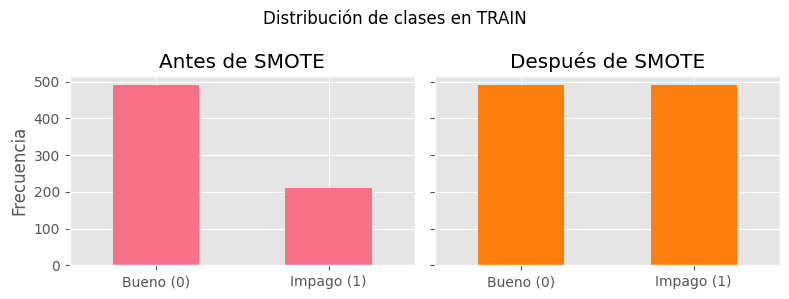

In [24]:
# Gráfico para visualizar distribución de clases antes y después del balanceo
fig, axes = plt.subplots(1, 2, figsize = (8, 3), sharey = True)
dist_antes.plot(kind = "bar", ax = axes[0], title = "Antes de SMOTE")
axes[0].set_xticklabels(["Bueno (0)","Impago (1)"], rotation = 0)
axes[0].set_ylabel("Frecuencia")
dist_despues.plot(kind = "bar", ax = axes[1], title = "Después de SMOTE", color = "tab:orange")
axes[1].set_xticklabels(["Bueno (0)","Impago (1)"], rotation = 0)
plt.suptitle("Distribución de clases en TRAIN")
plt.tight_layout()
plt.show()

#### <strong><font color="green">3. Construcción del modelo</font></strong>

In [25]:
INPUT_DIM = Xtr.shape[1]        # Dimensión de entrada (número de características después del preprocesamiento)
LR = 1e-3                       # Tasa de aprendizaje inicial para el optimizador
L2 = 1e-4                       # Parámetro de regularización L2 para evitar sobreajuste
DROPOUT = 0.2                   # Tasa de Dropout para reducir sobreajuste desactivando neuronas aleatoriamente
EPOCHS = 80                     # Número total de épocas de entrenamiento
BATCH_SIZE = 256                # Tamaño de lote (número de muestras procesadas antes de actualizar los pesos)
MONITOR = "val_auc"             # Métrica a monitorear durante el entrenamiento (área bajo la curva ROC en validación)

In [26]:
# Modelo 1: DNN simple
"""
Este bloque de código construye una red neuronal profunda (DNN simple) para clasificación binaria.
La arquitectura incluye varias capas densas con activación ReLU, regularización L2 y Dropout 
para reducir el sobreajuste. La salida usa activación sigmoide para producir probabilidades.
"""

# Capa de entrada con dimensión igual al número de features
inputs_dnn = keras.Input(shape = (INPUT_DIM,), name = "inputs_dnn")  

# Primera capa densa con 256 neuronas, activación ReLU y regularización L2
x = layers.Dense(256, activation = "relu", kernel_regularizer = regularizers.l2(L2))(inputs_dnn)  

# Dropout para reducir sobreajuste
x = layers.Dropout(DROPOUT)(x)  

# Segunda capa densa con 128 neuronas, activación ReLU y regularización L2
x = layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(L2))(x)  

# Dropout
x = layers.Dropout(DROPOUT)(x)

# Tercera capa densa con 64 neuronas, activación ReLU y regularización L2
x = layers.Dense(64, activation = "relu", kernel_regularizer = regularizers.l2(L2))(x)  

# Dropout
x = layers.Dropout(DROPOUT)(x)  

# Capa de salida con 1 neurona y activación sigmoide para clasificación binaria
outputs_dnn = layers.Dense(1, activation = "sigmoid")(x)  

# Define el modelo completo conectando entradas y salidas
model_dnn = keras.Model(inputs_dnn, outputs_dnn, name = "DNN_simple")

In [27]:
# Compilar modelo DNN simple
model_dnn.compile(
    optimizer = keras.optimizers.Adam(LR),      # Optimizador Adam con la tasa de aprendizaje definida
    loss = "binary_crossentropy",               # Función de pérdida para clasificación binaria
    metrics = [
        keras.metrics.BinaryAccuracy(name = "accuracy"), # Métrica de exactitud (predicciones correctas)
        keras.metrics.AUC(name = "auc"),                 # Área bajo la curva ROC
        keras.metrics.Precision(name = "precision"),     # Precisión (proporción de verdaderos positivos)
        keras.metrics.Recall(name = "recall"),           # Recall (proporción de positivos detectados)
    ],
)

# Mostrar la arquitectura del modelo
model_dnn.summary()

Model: "DNN_simple"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs_dnn (InputLayer)         │ (None, 71)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,649 (233.00 KB)

 Trainable params: 59,649 (233.00 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Modelo 2: ResNet tabular
"""
Este bloque de código define las primeras capas de una red neuronal tipo ResNet 
para datos tabulares. Se utiliza una capa densa inicial, seguida de normalización por lotes 
y activación ReLU, con regularización L2 para reducir el sobreajuste.
"""

# Capa de entrada con dimensión igual al número de características
inputs_res = keras.Input(shape = (INPUT_DIM,), name = "inputs_resnet")  

# Capa densa con 256 neuronas y regularización L2
z = layers.Dense(256, kernel_regularizer = regularizers.l2(L2))(inputs_res)  

# Normalización por lotes para estabilizar y acelerar el entrenamiento
z = layers.BatchNormalization()(z)  

# Activación ReLU para introducir no linealidad
z = layers.Activation("relu")(z)  

In [29]:
# Bloques residuales (3 bloques)
"""
Este bloque de código implementa bloques residuales (ResNet blocks) 
para una red neuronal aplicada a datos tabulares. 
Cada bloque tiene una rama principal y una conexión de atajo (shortcut) 
que permite el flujo de gradientes y ayuda a entrenar redes más profundas.
"""

WIDTH = 256  # Número de neuronas en cada capa del bloque residual

for b in range(3):  # Construcción de 3 bloques residuales
    shortcut = z  # Se guarda la entrada original para la conexión residual
    
    # Rama principal
    # Primera capa densa con regularización L2
    h = layers.Dense(WIDTH, kernel_regularizer = regularizers.l2(L2))(z)
    h = layers.BatchNormalization()(h)       # Normalización por lotes
    h = layers.Activation("relu")(h)         # Activación ReLU
    h = layers.Dropout(DROPOUT)(h)           # Dropout para evitar sobreajuste
    
    # Segunda capa densa con regularización L2
    h = layers.Dense(WIDTH, kernel_regularizer = regularizers.l2(L2))(h)
    h = layers.BatchNormalization()(h)       # Normalización por lotes
    
    # Rama de atajo (shortcut)
    # Ajusta la dimensión si no coincide con WIDTH
    if shortcut.shape[-1] != WIDTH:
        shortcut = layers.Dense(WIDTH, kernel_regularizer = regularizers.l2(L2))(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)
    
    # Combina ramas
    z = layers.Add()([shortcut, h])   # Suma residual: salida = shortcut + rama principal
    z = layers.Activation("relu")(z)  # Activación final del bloque

In [30]:
"""
Este bloque de código define la capa de salida y construye el modelo completo tipo ResNet 
para clasificación binaria en datos tabulares.
"""

# Capa de salida con 1 neurona y activación sigmoide para obtener probabilidad entre 0 y 1
outputs_res = layers.Dense(1, activation = "sigmoid")(z)  

# Construcción del modelo ResNet conectando entradas y salidas
model_res = keras.Model(inputs_res, outputs_res, name = "ResNet_Tabular")

In [31]:
# Compilar el modelo ResNet tabular
model_res.compile(
    optimizer = keras.optimizers.Adam(LR),      # Optimizador Adam con la tasa de aprendizaje definida
    loss = "binary_crossentropy",               # Función de pérdida para clasificación binaria
    metrics = [
        keras.metrics.BinaryAccuracy(name = "accuracy"), # Exactitud en clasificación
        keras.metrics.AUC(name = "auc"),                 # Área bajo la curva ROC
        keras.metrics.Precision(name = "precision"),     # Precisión: TP / (TP + FP)
        keras.metrics.Recall(name = "recall"),           # Recall: TP / (TP + FN)
    ],
)

# Mostrar la arquitectura del modelo
model_res.summary()

Model: "ResNet_Tabular"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ inputs_resnet       │ (None, 71)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 256)       │     18,432 │ inputs_resnet[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 256)       │      1,024 │ dense_4[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 256)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 256)       │     65,792 │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_5[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 256)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 256)       │          0 │ activation_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 256)       │     65,792 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_6[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 256)       │          0 │ activation[0][0], │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 256)       │          0 │ add[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 256)       │     65,792 │ activation_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_7[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 256)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 256)       │          0 │ activation_3[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 256)       │     65,792 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_8[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 256)       │          0 │ activation_2[0][… │
│                     │                   │            │ batch_normalizat

 Total params: 420,609 (1.60 MB)

 Trainable params: 417,025 (1.59 MB)

 Non-trainable params: 3,584 (14.00 KB)

In [32]:
# Callbacks
"""
Este bloque de código define una lista de callbacks para mejorar el entrenamiento del modelo. 
Incluye EarlyStopping y ReduceLROnPlateau para evitar sobreajuste y optimizar el aprendizaje.
"""

CB = [
    callbacks.EarlyStopping(            # Detiene el entrenamiento si no hay mejora en la métrica monitoreada
        monitor = MONITOR,              # Métrica a monitorear (ej. "val_auc")
        patience = 10,                  # Número de épocas de espera antes de detener el entrenamiento
        mode = "max",                   # Se busca maximizar la métrica
        restore_best_weights = True,    # Restaura los mejores pesos obtenidos
        verbose = 1                     # Muestra mensajes en consola
    ),
    callbacks.ReduceLROnPlateau(        # Reduce la tasa de aprendizaje cuando no hay mejora
        monitor = MONITOR,              # Métrica a monitorear
        factor = 0.5,                   # Factor de reducción (nueva_lr = lr * factor)
        patience = 5,                   # Número de épocas de espera antes de reducir lr
        mode = "max",                   # Se busca maximizar la métrica
        verbose = 1                     # Muestra mensajes en consola
    ),
]

In [33]:
# Definir parámetros para entrenamiento de modelos
"""
Este bloque de código define los argumentos para entrenar el modelo 
utilizando Keras `model.fit()`. Incluye los datos de entrenamiento balanceados, 
validación, número de épocas, tamaño de lote, callbacks y nivel de verbosidad.
"""

fit_args = dict(
    x = Xtr_bal,                        # Datos de entrenamiento balanceados (features)
    y = ytr_bal,                        # Etiquetas correspondientes al entrenamiento balanceado
    validation_data = (Xv, y_val),      # Datos de validación (features y etiquetas)
    epochs = EPOCHS,                    # Número total de épocas de entrenamiento
    batch_size = BATCH_SIZE,            # Tamaño de lote
    callbacks = CB,                     # Lista de callbacks (EarlyStopping, ReduceLROnPlateau, etc.)
    verbose = 2                         # Nivel de detalle en la salida (2 = una línea por época)
)

In [34]:
# Entrenar modelo DNN simple
print("🚀 Entrenando DNN simple (SMOTE)")
hist_dnn = model_dnn.fit(**fit_args)

🚀 Entrenando DNN simple (SMOTE)
Epoch 1/80
4/4 - 2s - 403ms/step - accuracy: 0.4867 - auc: 0.4804 - loss: 0.7402 - precision: 0.4879 - recall: 0.5327 - val_accuracy: 0.7667 - val_auc: 0.6848 - val_loss: 0.6830 - val_precision: 0.7273 - val_recall: 0.3556 - learning_rate: 0.0010
Epoch 2/80
4/4 - 0s - 20ms/step - accuracy: 0.6153 - auc: 0.6833 - loss: 0.6973 - precision: 0.6647 - recall: 0.4653 - val_accuracy: 0.7467 - val_auc: 0.7485 - val_loss: 0.6609 - val_precision: 0.5814 - val_recall: 0.5556 - learning_rate: 0.0010
Epoch 3/80
4/4 - 0s - 20ms/step - accuracy: 0.6786 - auc: 0.7505 - loss: 0.6626 - precision: 0.6789 - recall: 0.6776 - val_accuracy: 0.7400 - val_auc: 0.7716 - val_loss: 0.6401 - val_precision: 0.5517 - val_recall: 0.7111 - learning_rate: 0.0010
Epoch 4/80
4/4 - 0s - 21ms/step - accuracy: 0.7357 - auc: 0.7936 - loss: 0.6225 - precision: 0.7167 - recall: 0.7796 - val_accuracy: 0.7667 - val_auc: 0.7869 - val_loss: 0.5964 - val_precision: 0.5893 - val_recall: 0.7333 - learn

In [35]:
# Entrenar modelo ResNet Tabular
print("🚀 Entrenando ResNet Tabular (SMOTE)")
hist_res = model_res.fit(**fit_args)

🚀 Entrenando ResNet Tabular (SMOTE)
Epoch 1/80
4/4 - 4s - 885ms/step - accuracy: 0.6378 - auc: 0.6864 - loss: 0.9028 - precision: 0.6484 - recall: 0.6020 - val_accuracy: 0.6933 - val_auc: 0.7303 - val_loss: 0.8118 - val_precision: 0.4923 - val_recall: 0.7111 - learning_rate: 0.0010
Epoch 2/80
4/4 - 0s - 27ms/step - accuracy: 0.7980 - auc: 0.8892 - loss: 0.5894 - precision: 0.7704 - recall: 0.8490 - val_accuracy: 0.7467 - val_auc: 0.7594 - val_loss: 0.7585 - val_precision: 0.6296 - val_recall: 0.3778 - learning_rate: 0.0010
Epoch 3/80
4/4 - 0s - 26ms/step - accuracy: 0.8592 - auc: 0.9445 - loss: 0.4665 - precision: 0.8506 - recall: 0.8714 - val_accuracy: 0.7467 - val_auc: 0.7658 - val_loss: 0.7639 - val_precision: 0.5745 - val_recall: 0.6000 - learning_rate: 0.0010
Epoch 4/80
4/4 - 0s - 26ms/step - accuracy: 0.9020 - auc: 0.9693 - loss: 0.4005 - precision: 0.8988 - recall: 0.9061 - val_accuracy: 0.7533 - val_auc: 0.7744 - val_loss: 0.7531 - val_precision: 0.5870 - val_recall: 0.6000 - l

In [36]:
# Función para Curvas de entrenamiento
def _plot_history(h, title):
    """
    Grafica la evolución de las métricas durante el entrenamiento de un modelo Keras.
    
    Parámetros:
    - h (keras.callbacks.History): Objeto devuelto por model.fit() que contiene el historial.
    - title (str): Título general para la figura.
    
    Retorna:
    - None: La función muestra los gráficos y no retorna valor.
    
    Efectos:
    - Muestra tres gráficos en una misma figura:
        1. Accuracy (train vs val)
        2. AUC (train vs val)
        3. Loss (train vs val)
    """
    e = range(1, len(h.history["loss"]) + 1)        # Rango de épocas en el historial
    plt.figure(figsize = (16, 5))                   # Tamaño de la figura

    # Subplot Accuracy
    plt.subplot(1, 3, 1)
    plt.plot(e, h.history["accuracy"], label = "train")     # Accuracy en entrenamiento
    plt.plot(e, h.history["val_accuracy"], label = "val")   # Accuracy en validación
    plt.title("Accuracy")
    plt.xlabel("Épocas")
    plt.ylabel("Accuracy")
    plt.legend()

    # Subplot AUC
    plt.subplot(1, 3, 2)
    plt.plot(e, h.history["auc"], label = "train")          # AUC en entrenamiento
    plt.plot(e, h.history["val_auc"], label = "val")        # AUC en validación
    plt.title("AUC")
    plt.xlabel("Épocas")
    plt.ylabel("ROC-AUC")
    plt.legend()

    # Subplot Loss
    plt.subplot(1, 3, 3)
    plt.plot(e, h.history["loss"], label = "train")         # Loss en entrenamiento
    plt.plot(e, h.history["val_loss"], label = "val")       # Loss en validación
    plt.title("Loss")
    plt.xlabel("Épocas")
    plt.ylabel("Loss")
    plt.legend()

    plt.suptitle(title, fontsize = 16)      # Título general de la figura
    plt.tight_layout()                      # Ajusta el espaciado
    plt.show()                              # Muestra los gráficos

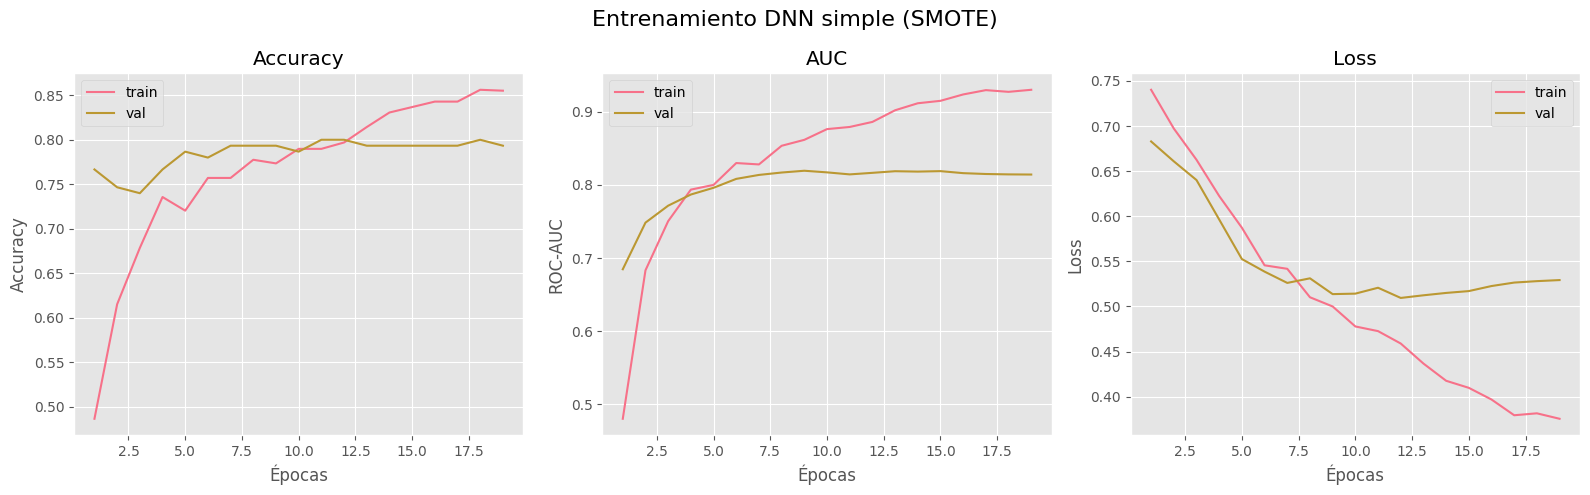

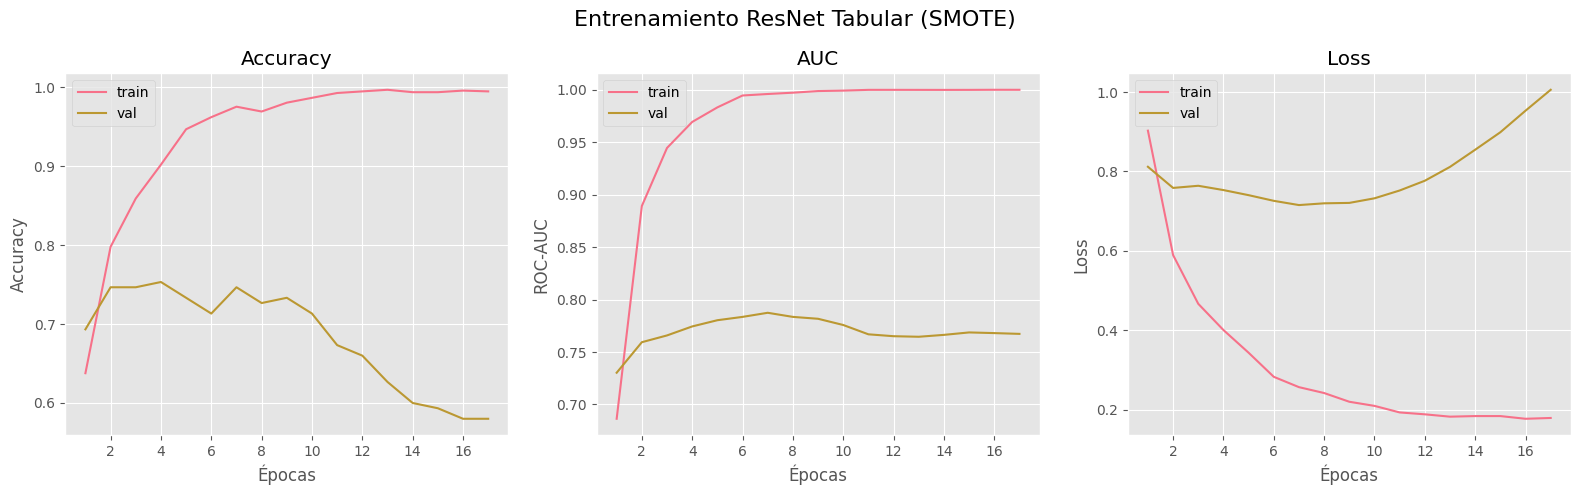

In [37]:
# Ver gráficas de entrenamiento de modelos
_plot_history(hist_dnn, "Entrenamiento DNN simple (SMOTE)")
_plot_history(hist_res, "Entrenamiento ResNet Tabular (SMOTE)")

📊 **Análisis de entrenamiento: DNN simple vs ResNet Tabular (con SMOTE)**

🔹 **DNN simple**
- **Accuracy**  
  - Inicia en ~0.5 (nivel azar) y sube de forma estable.  
  - En validación alcanza ~0.80 y se mantiene estable a partir de la época 7–8.  
  - En entrenamiento llega a ~0.86, mostrando una **brecha moderada** con validación (posible sobreajuste leve).  

- **AUC**  
  - En entrenamiento llega hasta ~0.93.  
  - En validación se estabiliza en ~0.81, sin caídas importantes → buen nivel de generalización.  

- **Loss**  
  - Disminuye de forma estable en entrenamiento.  
  - En validación baja hasta ~0.5 y luego se mantiene plana, sin divergencia fuerte.  

✅ **Conclusión DNN**:  
- El modelo logra un buen equilibrio entre entrenamiento y validación. Presenta un rendimiento estable con ligera tendencia a sobreajuste, pero en general es **robusto y confiable**.

---

🔹 **ResNet Tabular**
- **Accuracy**  
  - Crece muy rápido en entrenamiento y llega a **1.0 (perfecto)** en pocas épocas.  
  - En validación se queda en ~0.70 y empieza a bajar → clara señal de **sobreajuste fuerte**.  

- **AUC**  
  - En entrenamiento llega a casi 1.0.  
  - En validación se estanca en ~0.76–0.78 y no mejora → pobre capacidad de generalización.  

- **Loss**  
  - En entrenamiento disminuye de forma pronunciada.  
  - En validación baja levemente al inicio, pero luego empieza a **subir**, confirmando el **overfitting**.  

❌ **Conclusión ResNet**:  
- La arquitectura ResNet es mucho más potente y termina **sobreajustando rápidamente**. Aprende demasiado bien los patrones artificiales generados con SMOTE en entrenamiento, pero no logra transferir ese rendimiento al conjunto de validación/test.

---

⚖️ **Comparativa global**
- **DNN simple**  
  - Mejor equilibrio → rendimiento más estable y generalizable.  
  - AUC validación ~0.81 (decente).  
  - Ligero sobreajuste, pero controlado.  

- **ResNet Tabular**  
  - Mucha capacidad de modelado, pero **sobreajusta fuerte**.  
  - AUC validación solo ~0.76, pese a alcanzar casi 1.0 en entrenamiento.  
  - Requiere mayor regularización (Dropout más alto, EarlyStopping más estricto, o reducción de complejidad).  

---

✅ **Recomendación**:  
- Para este dataset, la **DNN simple es mejor opción en producción**, ya que ofrece un balance entre precisión y generalización.  
- La ResNet necesitaría ajustes adicionales para evitar el sobreajuste (más regularización, reducción de bloques o validación cruzada).

#### <strong><font color="green">4. Explicabilidad</font></strong>

In [38]:
"""
Este bloque de código aplica SHAP para interpretar el modelo seleccionado (DNN simple en este caso). 
Se define una función de predicción, se selecciona un conjunto de fondo mediante KMeans, 
se eligen muestras de prueba y se calculan los valores SHAP con KernelExplainer.
"""

# Selección del modelo a explicar (DNN simple)
best_model = model_dnn

# Función de predicción que devuelve probabilidades planas (ravel)
f = lambda data: best_model.predict(data, verbose = 0).ravel()  

# Selecciona 50 centroides mediante KMeans como conjunto de fondo para SHAP
X_bg = shap.kmeans(Xtr, 50)  

# Inicializa el generador aleatorio con la semilla definida
rng = np.random.default_rng(SEED)

# Selecciona índices aleatorios del conjunto de prueba (sample) hasta 200 muestras
sm_idx = rng.choice(Xte.shape[0], size = min(200, Xte.shape[0]), replace = False)

# Subconjunto de prueba usado como muestra para SHAP
X_sm = Xte[sm_idx]

# Se crea el explicador SHAP usando KernelExplainer con la función de predicción y el conjunto de fondo
explainer = shap.KernelExplainer(f, X_bg)  

# Calcula los valores SHAP sobre el conjunto de muestra, usando número automático de muestras
shap_values = explainer.shap_values(X_sm, nsamples = "auto")  

# Si los valores SHAP vienen en una lista (ej. en clasificación multiclase), se extrae el primer elemento
if isinstance(shap_values, list):
    shap_values = shap_values[0]

100%|██████████| 150/150 [05:24<00:00,  2.17s/it]


🔹 Importancia global (features codificadas):


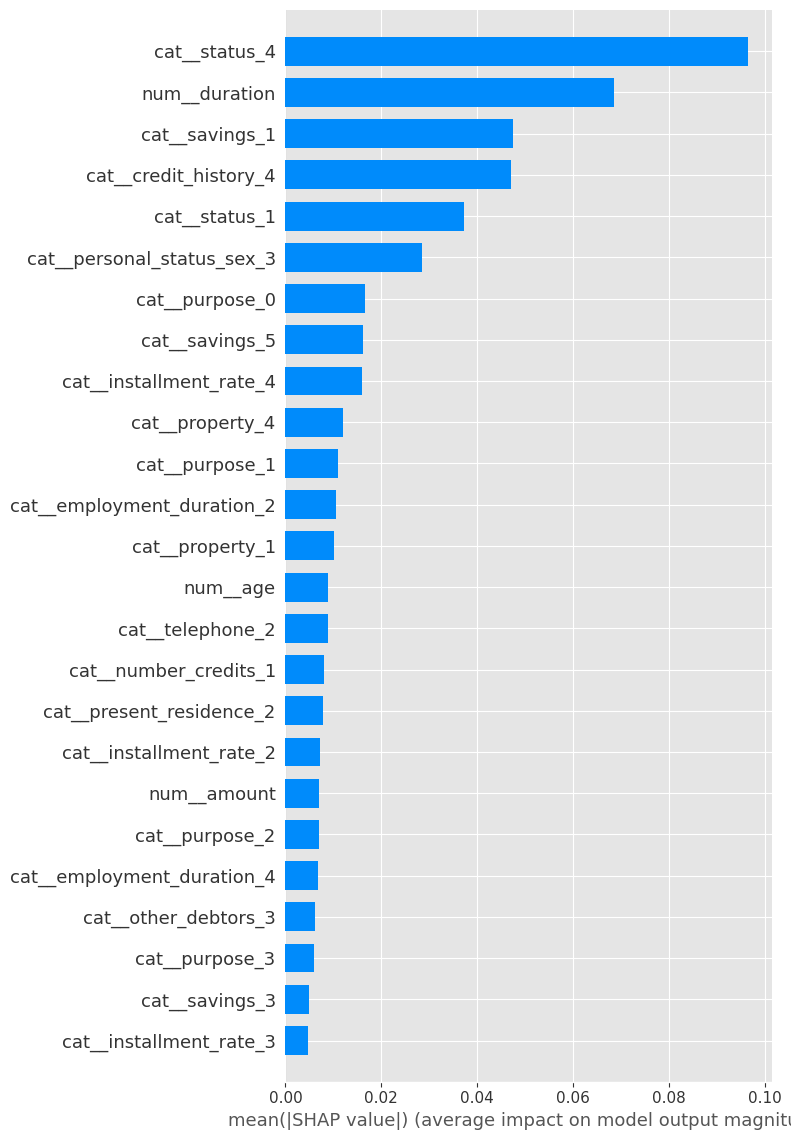

In [39]:
"""
Este bloque de código muestra la importancia global de las variables (features) 
utilizando un gráfico resumen de SHAP. 
Se visualizan las 25 características más relevantes en forma de barras.
"""

# Mensaje informativo en consola
print("🔹 Importancia global (features codificadas):")

# Genera un gráfico resumen de SHAP con las variables más importantes
shap.summary_plot(
    shap_values,                        # Valores SHAP calculados para las muestras
    X_sm,                               # Subconjunto de datos usado para la explicación
    feature_names = feature_names,      # Nombres de las características codificadas
    plot_type = "bar",                  # Tipo de gráfico (barras para importancia global)
    max_display = 25,                   # Número máximo de características a mostrar
    show = True                         # Mostrar el gráfico inmediatamente
)

🔹 Beeswarm:


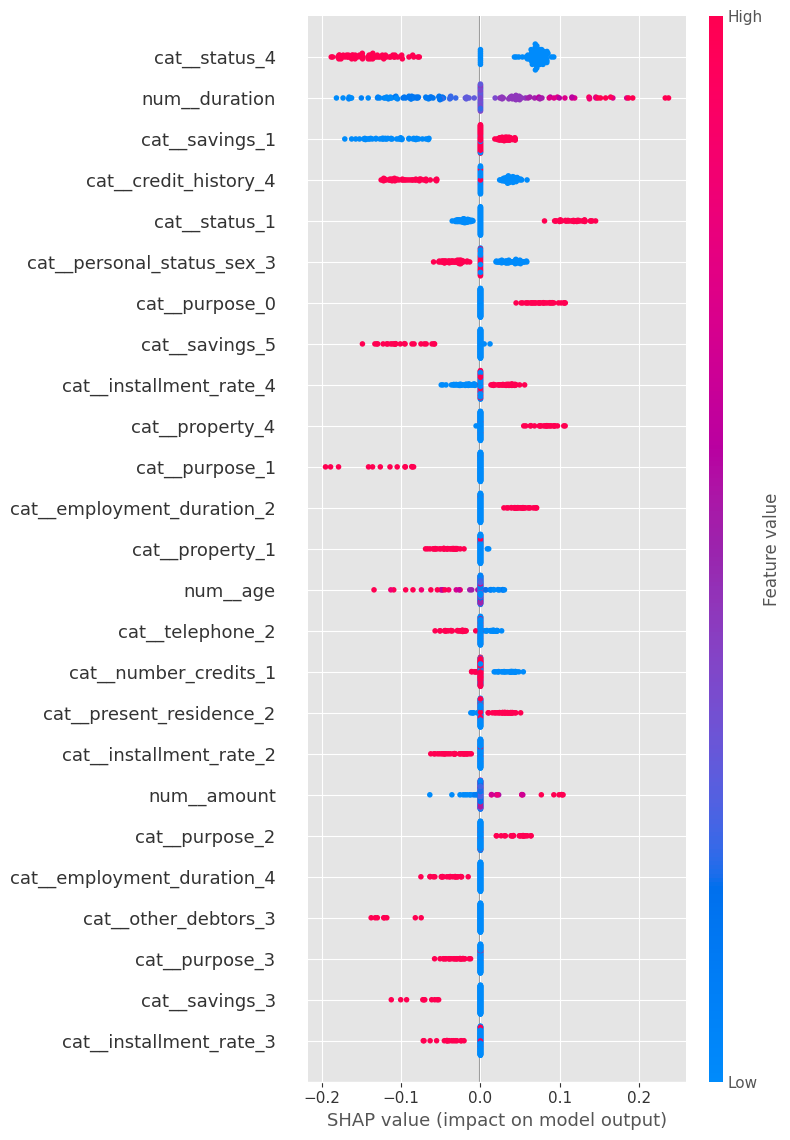

In [40]:
"""
Este bloque de código genera un gráfico tipo "Beeswarm" con SHAP, 
el cual muestra la distribución de los valores SHAP para cada variable, 
permitiendo observar tanto la importancia como la dirección del impacto 
positivo o negativo en las predicciones.
"""

# Mensaje informativo en consola
print("🔹 Beeswarm:")

# Genera el gráfico beeswarm de SHAP
shap.summary_plot(
    shap_values,                        # Valores SHAP calculados para las muestras
    X_sm,                               # Subconjunto de datos usado para la explicación
    feature_names = feature_names,      # Nombres de las características codificadas
    max_display = 25,                   # Número máximo de características a mostrar
    show = True                         # Mostrar el gráfico inmediatamente
)

In [41]:
# Agregación por variable original (suma |SHAP| de dummies)
"""
Este bloque de código calcula la importancia agregada de las variables originales 
(sumando la importancia de sus categorías en caso de variables categóricas) 
y muestra las 20 variables más relevantes en una tabla.
"""

# Obtiene el OneHotEncoder del preprocesador
enc = preprocessor.named_transformers_["cat"].named_steps["onehot"]

# Calcula la media de los valores absolutos SHAP para cada característica codificada
mean_abs_shap = np.mean(np.abs(shap_values), axis = 0)

# Diccionario para agrupar los índices de cada variable original (numéricas y categóricas)
groups = {c: [] for c in numeric_vars + categorical_vars}
idx = 0

# Variables numéricas (relación 1 a 1)
for c in numeric_vars:
    groups[c].append(idx)  # Cada variable numérica ocupa una sola columna
    idx += 1

# Variables categóricas (expandida por OneHot)
for i, c in enumerate(categorical_vars):
    n_dum = len(enc.categories_[i])                # Número de categorías creadas
    groups[c].extend(list(range(idx, idx + n_dum))) # Asigna índices correspondientes
    idx += n_dum

# Agregar importancia SHAP
rows = []
for col, inds in groups.items():
    # Suma la importancia de todas las columnas correspondientes a la misma variable original
    rows.append((col, float(np.sum(mean_abs_shap[inds]))))

# Crea un DataFrame con las importancias agregadas y las ordena
imp_agg = pd.DataFrame(rows, columns = ["feature", "mean_abs_shap_agg"]).sort_values("mean_abs_shap_agg", ascending = False)

# Mensaje informativo en consola
print("🔹 Importancia agregada de las variables originales:")

# Muestra las 20 variables más importantes según SHAP
imp_agg.head(20)

🔹 Importancia agregada de las variables originales:


,feature,mean_abs_shap_agg
3,status,0.138561
6,savings,0.072023
0,duration,0.068547
4,credit_history,0.051655
5,purpose,0.047846
9,personal_status_sex,0.033347
8,installment_rate,0.028659
12,property,0.023822
7,employment_duration,0.019028
11,present_residence,0.012401


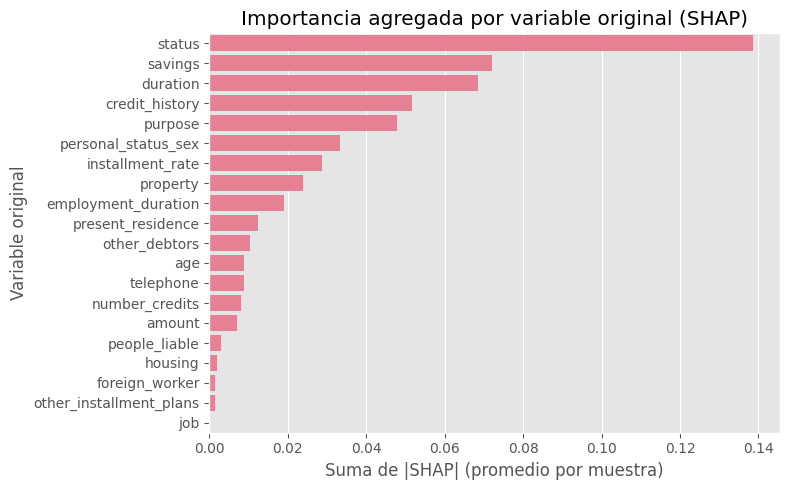

In [42]:
# Ver gráfico de importancia de variables
plt.figure(figsize = (8, 5))
sns.barplot(data = imp_agg.head(20), x = "mean_abs_shap_agg", y = "feature", orient = "h")
plt.title("Importancia agregada por variable original (SHAP)")
plt.xlabel("Suma de |SHAP| (promedio por muestra)")
plt.ylabel("Variable original")
plt.tight_layout()
plt.show()

📌 **Explicabilidad del modelo (SHAP) y contexto bancario**

Los gráficos y tablas de SHAP permiten identificar qué variables influyen más en la predicción de impago (1) o buen cliente (0).

---

🔹 **Variables más influyentes**
Según los gráficos de importancia global y la agregación por variable original, las variables más determinantes son:

1. **Status (estado de cuenta previo al crédito)**  
   - Es la variable más influyente. Ciertos estados (ej. `cat_status_4`) elevan fuertemente la probabilidad de impago.  
   - Esto tiene sentido: la situación crediticia previa refleja directamente el riesgo de incumplimiento.

2. **Savings (nivel de ahorros)**  
   - Un nivel bajo de ahorros incrementa el riesgo de impago.  
   - Clientes con mayores ahorros ofrecen más seguridad al banco, ya que poseen un colchón financiero.

3. **Duration (duración del crédito en meses)**  
   - Créditos más largos tienden a asociarse con mayor riesgo.  
   - En préstamos extensos, aumentan las probabilidades de que el cliente atraviese dificultades económicas durante el periodo.

4. **Credit history (historial de crédito)**  
   - Historial negativo (morosidades previas, retrasos) incrementa el riesgo.  
   - Un historial sólido disminuye la probabilidad de impago.

5. **Purpose (propósito del crédito)**  
   - Algunos fines (ej. consumo, bienes no esenciales) muestran mayor riesgo en comparación con propósitos más estables (ej. vivienda).

6. **Personal status & sex**  
   - La combinación de estado civil y sexo aparece como variable explicativa, aunque debe analizarse con cuidado para evitar sesgos indebidos en decisiones de crédito.

---

 🔹 **Interpretación de los gráficos SHAP**
- **Summary barplot (importancia global codificada)**  
  Muestra el ranking de variables más relevantes. El `status` y la `duration` tienen el mayor impacto promedio sobre las predicciones.

- **Beeswarm plot**  
  Permite ver la dirección de la influencia:  
  - Valores altos de `duration` (rojo) tienden a desplazar los SHAP values hacia el lado positivo (mayor riesgo).  
  - Ciertas categorías de `status` generan fuertes impactos positivos en la predicción de impago.  
  - Para variables como `savings`, valores bajos (azul) están asociados a un aumento del riesgo.

- **Agregación por variable original**  
  Confirma que las 5 variables más importantes son: `status`, `savings`, `duration`, `credit_history` y `purpose`.

---

🔹 **Implicancias en contexto bancario**
- **Variables financieras clásicas (status, savings, duration, credit_history)** tienen un peso crucial y validan que el modelo esté alineado con criterios tradicionales de evaluación de riesgo.  
- **Variables socio-demográficas (personal_status_sex)**, aunque explicativas, deben tratarse con cautela para no incurrir en **discriminación o sesgos**.  
- **Propósito del crédito** permite entender qué tipos de préstamos representan mayor exposición para el banco, lo que puede ayudar a ajustar políticas internas.  
- El uso de SHAP asegura **transparencia y explicabilidad**, requisito clave en entornos regulados: se puede justificar por qué se aprueba o rechaza un crédito.  
- Desde la perspectiva de negocio:  
  - Identificar que un cliente con mal historial y bajo nivel de ahorros tiene alta probabilidad de impago permite diseñar **estrategias de mitigación** (ej. garantías, tasas ajustadas, límites de monto).  
  - A la vez, da confianza de que el modelo no es una "caja negra" y que las decisiones pueden auditarse.

---

✅ **Conclusión**:  
- El modelo basa sus predicciones en factores lógicos y coherentes con la práctica crediticia. Variables como `status`, `savings`, `duration` y `credit_history` son las más determinantes.  
Esto asegura que el sistema de scoring no solo es preciso, sino también **interpretativo y justificable** en un contexto bancario, lo cual es esencial para cumplir con criterios de transparencia, regulación y equidad.

#### <strong><font color="green">5. Evaluación</font></strong>


##### <strong><font color="DarkSeaGreen">🔸Métricas: precisión, recall, F1-score, curva ROC.</font></strong>

In [43]:
# Función para calcular métricas dado umbral de decisión
def metrics_at_threshold(y_true, y_prob, thr: float):
    """
    Calcula métricas de clasificación binaria dado un umbral de decisión.

    Parámetros:
    - y_true (array-like): Etiquetas reales (0 o 1).
    - y_prob (array-like): Probabilidades predichas para la clase positiva.
    - thr (float): Umbral de decisión para clasificar como positivo.

    Retorna:
    - dict: Diccionario con las métricas:
        - "thr": Umbral usado.
        - "accuracy": Exactitud.
        - "precision": Precisión.
        - "recall": Recall.
        - "f1": F1-score.
        - "auc": Área bajo la curva ROC (AUC).
        - "cm": Matriz de confusión (2x2).
    
    Efectos:
    - Calcula métricas de rendimiento al aplicar un umbral específico sobre las probabilidades.
    """
    # Aplica el umbral para convertir probabilidades en clases predichas
    y_pred = (y_prob >= thr).astype(int)
    
    # Calcula la matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    
    # Retorna las métricas en un diccionario
    return {
        "thr": thr,                                                         # Umbral usado
        "accuracy": accuracy_score(y_true, y_pred),                         # Exactitud
        "precision": precision_score(y_true, y_pred, zero_division = 0),    # Precisión
        "recall": recall_score(y_true, y_pred, zero_division = 0),          # Recall
        "f1": f1_score(y_true, y_pred, zero_division = 0),                  # F1-score
        "auc": roc_auc_score(y_true, y_prob),                               # AUC-ROC
        "cm": cm                                                            # Matriz de confusión
    }

In [44]:
# Función para graficar matriz de confusión
def plot_cm(cm, title):
    """
    Grafica una matriz de confusión como mapa de calor.

    Parámetros:
    - cm (ndarray): Matriz de confusión (valores enteros).
    - title (str): Título del gráfico.

    Retorna:
    - None: La función muestra el gráfico y no retorna valor.

    Efectos:
    - Visualiza la matriz de confusión con etiquetas fijas para clases "Bueno" e "Impago".
    - Añade anotaciones de conteos en cada celda.
    """
    plt.figure(figsize = (4, 4))  # Tamaño de la figura
    sns.heatmap(
        cm,
        annot = True, fmt = "d", cmap = "Blues", cbar = False,      # Muestra valores enteros sin barra lateral
        xticklabels = ["Pred 0: Bueno", "Pred 1: Impago"],          # Etiquetas eje X
        yticklabels = ["Real 0: Bueno", "Real 1: Impago"]           # Etiquetas eje Y
    )
    plt.title(title)            # Título del gráfico
    plt.xlabel("Predicción")    # Etiqueta eje X
    plt.ylabel("Real")          # Etiqueta eje Y
    plt.tight_layout()          # Ajusta espaciado
    plt.show()                  # Muestra la figura

In [45]:
# Probabilidades en validación (para buscar umbrales) y test
val_prob_dnn = model_dnn.predict(Xv, verbose = 0).ravel()
val_prob_res = model_res.predict(Xv, verbose = 0).ravel()
test_prob_dnn = model_dnn.predict(Xte, verbose = 0).ravel()
test_prob_res = model_res.predict(Xte, verbose = 0).ravel()

In [46]:
# Umbral que maximiza F1 (en validación)
"""
Este bloque de código busca el umbral de decisión óptimo (threshold) para los modelos DNN y ResNet, 
maximizando la métrica F1 en el conjunto de validación. 
Se evalúan distintos valores de umbral entre 0.05 y 0.95 y se selecciona el mejor.
"""

# Lista de posibles umbrales entre 0.05 y 0.95 en pasos de 0.05
candidatos = np.linspace(0.05, 0.95, 19)

# Búsqueda del mejor umbral para el modelo DNN
best_dnn = None
for t in candidatos:
    m = metrics_at_threshold(y_val, val_prob_dnn, t)  # Calcula métricas para el umbral t
    if (best_dnn is None) or (m["f1"] > best_dnn["f1"]):  # Actualiza si mejora el F1
        best_dnn = m

# Búsqueda del mejor umbral para el modelo ResNet
best_res = None
for t in candidatos:
    m = metrics_at_threshold(y_val, val_prob_res, t)  # Calcula métricas para el umbral t
    if (best_res is None) or (m["f1"] > best_res["f1"]):  # Actualiza si mejora el F1
        best_res = m

# Resultados
print(f"🔹 Umbral F1* DNN: {best_dnn['thr']:.2f} | F1(val) = {best_dnn['f1']:.3f}")
print(f"🔹 Umbral F1* Res: {best_res['thr']:.2f} | F1(val) = {best_res['f1']:.3f}")

🔹 Umbral F1* DNN: 0.40 | F1(val) = 0.680
🔹 Umbral F1* Res: 0.50 | F1(val) = 0.612


In [47]:
# Evaluación en test @0.5 y @F1*
eval_dnn_05 = metrics_at_threshold(y_test, test_prob_dnn, 0.5)
eval_res_05 = metrics_at_threshold(y_test, test_prob_res, 0.5)
eval_dnn_bf = metrics_at_threshold(y_test, test_prob_dnn, best_dnn["thr"])
eval_res_bf = metrics_at_threshold(y_test, test_prob_res, best_res["thr"])

🔹 [DNN @0.5] {'thr': 0.5, 'accuracy': 0.707, 'precision': 0.509, 'recall': 0.622, 'f1': 0.56, 'auc': 0.77}


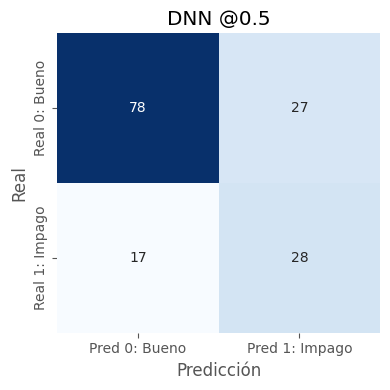


🔹 [DNN @best-F1] {'thr': 0.4, 'accuracy': 0.66, 'precision': 0.456, 'recall': 0.689, 'f1': 0.549, 'auc': 0.77}


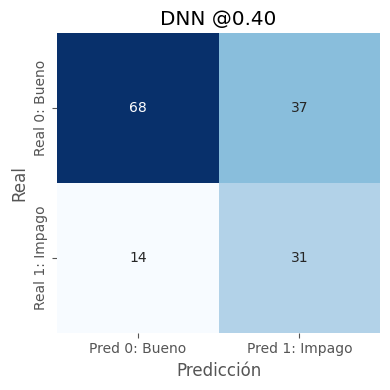

In [48]:
# Ver evaluaciones para DNN
print("🔹 [DNN @0.5]", {k: round(v,3) for k,v in eval_dnn_05.items() if k!='cm'})
plot_cm(eval_dnn_05["cm"], "DNN @0.5")
print("\n🔹 [DNN @best-F1]", {k: round(v,3) for k,v in eval_dnn_bf.items() if k!='cm'})
plot_cm(eval_dnn_bf["cm"], f"DNN @{eval_dnn_bf['thr']:.2f}")

🔹 [ResNet @0.5] {'thr': 0.5, 'accuracy': 0.72, 'precision': 0.525, 'recall': 0.711, 'f1': 0.604, 'auc': 0.767}


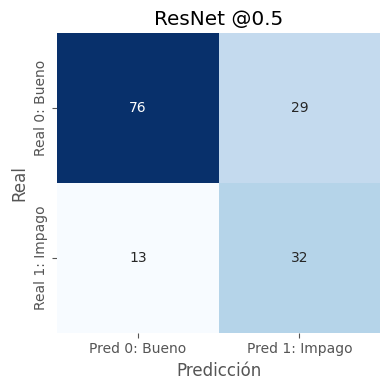


🔹 [ResNet @best-F1] {'thr': 0.5, 'accuracy': 0.72, 'precision': 0.525, 'recall': 0.711, 'f1': 0.604, 'auc': 0.767}


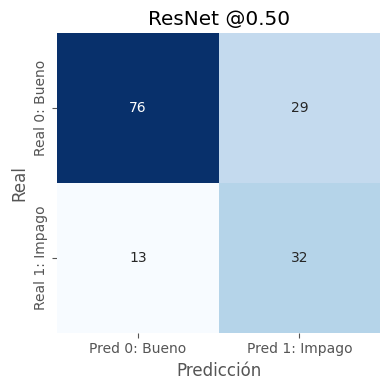

In [49]:
# Ver evaluaciones para ResNet
print("🔹 [ResNet @0.5]", {k: round(v,3) for k,v in eval_res_05.items() if k!='cm'})
plot_cm(eval_res_05["cm"], "ResNet @0.5")
print("\n🔹 [ResNet @best-F1]", {k: round(v,3) for k,v in eval_res_bf.items() if k!='cm'})
plot_cm(eval_res_bf["cm"], f"ResNet @{eval_res_bf['thr']:.2f}")

In [50]:
# Función para Curvas ROC
def plot_roc(y_true, y_prob, title):
    """
    Grafica la curva ROC (Receiver Operating Characteristic) y muestra el AUC.
    
    Parámetros:
    - y_true (array-like): Etiquetas reales (0 o 1).
    - y_prob (array-like): Probabilidades predichas para la clase positiva.
    - title (str): Título del gráfico.
    
    Retorna:
    - None: La función muestra el gráfico y no retorna valor.
    
    Efectos:
    - Calcula la curva ROC y el AUC.
    - Muestra la curva ROC con línea diagonal de referencia.
    """
    # Calcula tasa de falsos positivos (FPR), verdaderos positivos (TPR) y umbrales
    fpr, tpr, thr = roc_curve(y_true, y_prob)
    
    # Calcula área bajo la curva
    auc = roc_auc_score(y_true, y_prob)

    plt.figure(figsize = (5, 4))                   # Tamaño de la figura
    plt.plot(fpr, tpr, label = f"AUC = {auc:.3f}")   # Curva ROC
    plt.plot([0, 1], [0, 1], "--")               # Línea diagonal de referencia
    plt.xlabel("FPR")                            # Eje X: tasa de falsos positivos
    plt.ylabel("TPR")                            # Eje Y: tasa de verdaderos positivos
    plt.title(title)                             # Título del gráfico
    plt.legend()                                 # Leyenda
    plt.tight_layout()                           # Ajusta espaciado
    plt.show()                                   # Muestra la figura

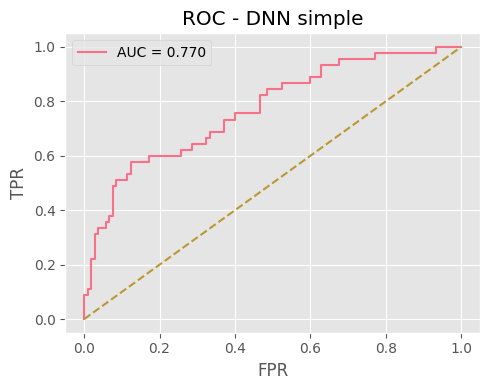

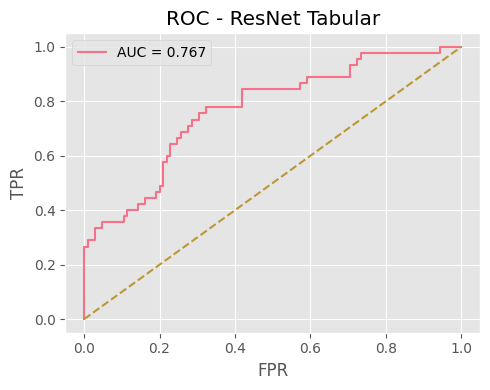

In [51]:
# Ver curvas ROC
plot_roc(y_test, test_prob_dnn, "ROC - DNN simple")
plot_roc(y_test, test_prob_res, "ROC - ResNet Tabular")

##### <strong><font color="DarkSeaGreen">🔸Análisis del impacto de errores tipo I y II en contexto financiero.</font></strong>

In [52]:
# Análisis de costos (Tipo I y II)
"""
Este bloque de código define los costos asociados a los errores de clasificación 
en el contexto financiero (crédito). Se diferencian los costos de errores tipo I (FP) 
y tipo II (FN), siendo estos últimos más graves debido a las pérdidas monetarias 
por no detectar clientes que no pagarán.

- Positivo = impago (1)
- Tipo I (FP): predecir impago a alguien que es buen cliente (rechazo injustificado)
- Tipo II (FN): predecir bueno a quien impaga (pérdida económica mayor)
"""

COST_FP = 1.0   # Costo relativo por clasificar erróneamente a un buen cliente como riesgoso
COST_FN = 10.0  # Costo relativo por clasificar erróneamente a un cliente riesgoso como buen cliente

In [53]:
# Función para calcular costo total de predicciones
def costo_total(y_true, y_prob, thr):
    """
    Calcula el costo total de las predicciones según un umbral y los costos
    asignados a falsos positivos y falsos negativos.

    Parámetros:
    - y_true (array-like): Etiquetas reales (0 o 1).
    - y_prob (array-like): Probabilidades predichas para la clase positiva.
    - thr (float): Umbral de decisión para clasificar como positivo.

    Retorna:
    - tuple: (costo_total, (tn, fp, fn, tp)):
        - costo_total (float): Costo total = FP * COST_FP + FN * COST_FN
        - (tn, fp, fn, tp): Valores de la matriz de confusión.
    
    Efectos:
    - Aplica el umbral a las probabilidades.
    - Calcula matriz de confusión y el costo asociado.
    """
    # Clasifica según el umbral
    y_pred = (y_prob >= thr).astype(int)
    
    # Extrae TN, FP, FN, TP de la matriz de confusión
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Calcula el costo total usando los costos definidos globalmente
    return fp * COST_FP + fn * COST_FN, (tn, fp, fn, tp)

In [54]:
# Selección de umbral por costo mínimo (en validación)
"""
Este bloque de código busca el umbral de decisión que minimiza el costo total 
para los modelos DNN y ResNet, considerando los costos relativos de errores 
tipo I (FP) y tipo II (FN). Se selecciona el umbral con menor costo en validación.
"""

# Búsqueda del mejor umbral (mínimo costo) para el modelo DNN
cost_best_dnn = None
for t in candidatos:
    c, cm = costo_total(y_val, val_prob_dnn, t)                 # Calcula el costo y matriz de confusión
    if (cost_best_dnn is None) or (c < cost_best_dnn[0]):       # Se queda con el menor costo
        cost_best_dnn = (c, t, cm)

# Búsqueda del mejor umbral (mínimo costo) para el modelo ResNet
cost_best_res = None
for t in candidatos:
    c, cm = costo_total(y_val, val_prob_res, t)   # Calcula el costo y matriz de confusión
    if (cost_best_res is None) or (c < cost_best_res[0]):  # Se queda con el menor costo
        cost_best_res = (c, t, cm)

# Resultados
print(f"🔹 Umbral mínimo costo (DNN): thr = {cost_best_dnn[1]:.2f}, costo = {cost_best_dnn[0]:.1f}, cm(val) = {cost_best_dnn[2]}")
print(f"🔹 Umbral mínimo costo (Res): thr = {cost_best_res[1]:.2f}, costo = {cost_best_res[0]:.1f}, cm(val) = {cost_best_res[2]}")

🔹 Umbral mínimo costo (DNN): thr = 0.05, costo = 101.0, cm(val) = (14, 91, 1, 44)
🔹 Umbral mínimo costo (Res): thr = 0.20, costo = 97.0, cm(val) = (8, 97, 0, 45)


🔹 [DNN @best-cost] {'thr': 0.05, 'accuracy': 0.367, 'precision': 0.319, 'recall': 0.978, 'f1': 0.481, 'auc': 0.77}


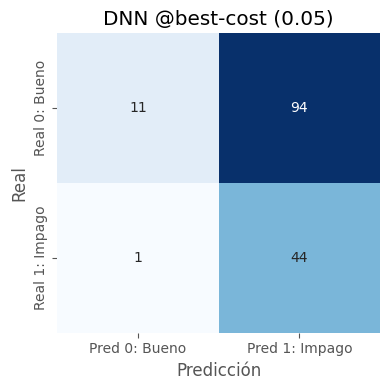

In [55]:
# Evaluación en test con umbral de costo (se usa DNN simple como ejemplo)
"""
Este bloque de código evalúa el modelo DNN en el conjunto de prueba usando 
el umbral que minimiza el costo total (en validación). 
Se imprimen las métricas principales y se muestra la matriz de confusión.
"""

# Recupera el umbral óptimo (mínimo costo) encontrado para el modelo DNN
thr_cost_dnn = cost_best_dnn[1]

# Evalúa el desempeño del modelo DNN en test con ese umbral
eval_dnn_cost = metrics_at_threshold(y_test, test_prob_dnn, thr_cost_dnn)

# Imprime las métricas (redondeadas a 3 decimales), excepto la matriz de confusión
print("🔹 [DNN @best-cost]", {k: round(v, 3) for k, v in eval_dnn_cost.items() if k != 'cm'})

# Grafica la matriz de confusión con el umbral aplicado
plot_cm(eval_dnn_cost["cm"], f"DNN @best-cost ({thr_cost_dnn:.2f})")

In [56]:
# Reporte de clasificación (ResNet @best-F1)
y_pred_dnn_bf = (test_prob_dnn >= eval_dnn_bf["thr"]).astype(int)
print("📜 Reporte de clasificación (DNN simple @best-F1)\n")
print(classification_report(y_test, y_pred_dnn_bf, target_names = ["Bueno (0)","Impago (1)"]))

📜 Reporte de clasificación (DNN simple @best-F1)

              precision    recall  f1-score   support

   Bueno (0)       0.83      0.65      0.73       105
  Impago (1)       0.46      0.69      0.55        45

    accuracy                           0.66       150
   macro avg       0.64      0.67      0.64       150
weighted avg       0.72      0.66      0.67       150



📈 **Evaluación del modelo y análisis de errores Tipo I/II (contexto financiero)**

A continuación se analiza el desempeño de **DNN simple** y **ResNet tabular** en *test*, usando tres criterios de decisión:
- **Umbral fijo 0.5**
- **Umbral que maximizó F1 en validación** (best‑F1)
- **Umbral que minimizó costo en validación** (best‑cost; costo(FP)=1, costo(FN)=10)

> Definición de clases: **1 = Impago (riesgoso)**, **0 = Bueno**.  
> **FP (Tipo I)**: rechazar a un buen cliente.  
> **FN (Tipo II)**: aprobar a un cliente que impaga.

---

**1. Métricas principales observadas**

🔹 **DNN @ 0.50**
- **CM**: TN=78, FP=27, FN=17, TP=28  
- **Accuracy** 0.707 · **Precision** 0.509 · **Recall** 0.622 · **F1** 0.560 · **AUC** 0.770  
- **Aceptación** (pred. buenos) = (TN+FN)/N = 95/150 = **63.3%**

🔹 **DNN @ best‑F1 (0.40, aprendido en validación)**
- **CM**: TN=68, FP=37, FN=14, TP=31  
- **Accuracy** 0.660 · **Precision** 0.456 · **Recall** 0.689 · **F1** 0.549 · **AUC** 0.770  
- **Aceptación** = 82/150 = **54.7%**

🔹 **ResNet @ 0.50  *(best‑F1 coincide con 0.50)***
- **CM**: TN=76, FP=29, FN=13, TP=32  
- **Accuracy** 0.720 · **Precision** 0.525 · **Recall** 0.711 · **F1** 0.604 · **AUC** 0.767  
- **Aceptación** = 89/150 = **59.3%**

🔹 **DNN @ best‑cost (0.05, costo FP:FN = 1:10)**
- **CM**: TN=11, FP=94, FN=1, TP=44  
- **Accuracy** 0.367 · **Precision** 0.319 · **Recall** **0.978** · **F1** 0.481 · **AUC** 0.770  
- **Aceptación** = 12/150 = **8%** (rechazo masivo)

> **AUC** ≈ 0.77 en ambos modelos: la capacidad de ranking es similar; las diferencias vienen de **dónde fijamos el umbral**.

---

**2. Costeo de errores y trade‑offs**

Usamos la función de costo esperada:

$Costo = FP * C_FP + FN * C_FN$

Con C_FP = 1 y C_FN = 10 (FN es 10 veces más caro que FP).

- **DNN @0.50** → 27·1 + 17·10 = **197**
- **DNN @0.40** → 37·1 + 14·10 = **177**
- **ResNet @0.50** → 29·1 + 13·10 = **159**
- **DNN @best‑cost (0.05)** → 94·1 + 1·10 = **104**

**Lecturas clave**
- Con **relación de costos 10:1**, el **umbral muy bajo (0.05)** de DNN **minimiza costo** al **maximizar recall (0.978)** y casi eliminar FN, a costa de muchísimos FP (**rechazo 92%**).  
- Entre umbrales razonables (aceptación 55–65%), **ResNet @0.50** domina a DNN (menor FN y F1 más alto) y ofrece el **menor costo (159)** sin colapsar la tasa de aprobación.

**Punto de equilibrio de costos** entre DNN@best‑cost y ResNet@0.5:

$94 + 1 * r = 29 + 13 * r$

$⇒ r = 65 / 12 ≈ 5.42$

- Si $CFN​/CFP​<5.42$ → conviene **ResNet @0.50**.  
- Si $CFN​/CFP​>5.42$ → conviene **bajar el umbral** de forma agresiva (similar a DNN@0.05).

---

**3. Consecuencias financieras de FP y FN**

🔹 **FP (Tipo I) — Rechazar a un buen cliente**
- **Costos**: pérdida del margen de interés y comisiones, costo de adquisición del cliente, potencial churn reputacional.
- **Severidad**: normalmente **menor** que FN por unidad, pero **frecuentes** si ponemos umbrales muy bajos.
- **En DNN@0.05**: 94 FP/105 buenos → se rechaza ~**90% de buenos** → pérdida de ingresos y posible impacto reputacional/regulatorio (prácticas demasiado restrictivas).

🔹 **FN (Tipo II) — Aprobar a un cliente que impaga**
- **Costos**: pérdida de principal × LGD (recuperación neta), gastos operativos y legales.  
- **Severidad**: alta por unidad → justifica **recall** elevado para la clase 1.  
- **En ResNet@0.50**: 13 FN/45 riesgosos (recall 0.711) → buena captura de riesgo con aceptación ~59%.

> **Regla práctica**: si la **pérdida esperada** por un default (EAD×LGD) es **> 5.4×** el margen neto perdido por rechazar a un buen cliente, conviene operar con un **umbral más bajo** que incremente el **recall** incluso sacrificando precisión.

---

**4. Recomendación operativa**

1. **Modelo**: operar con **ResNet @ 0.50** como baseline.  
   - Mejor **F1**, **recall** más alto (0.711 vs 0.622 en DNN@0.5), **menor costo** que DNN para relaciones de costo ≤ 5.4.  
   - **Aceptación** ≈ **59%** (razonable comercialmente).

2. **Umbral por objetivo de negocio**:
   - Si el banco busca **minimizar pérdidas crediticias** y puede tolerar rechazo adicional, mover el umbral **por debajo de 0.5** hasta lograr el **recall objetivo** (p.ej., ≥0.80) **con una tasa de aprobación mínima acordada** (p.ej., ≥45–50%).  
   - Si se prioriza **volumen/penetración** (alta aprobación), subir umbral (≥0.55) controlando FN vía **políticas complementarias** (garantías, límites de monto, pricing).

3. **Optimización con restricción** (recomendado):
   - Elegir umbral **que minimice costo** **sujeto** a una **tasa de aprobación mínima** (por ejemplo, ≥50%) y/o a límites regulatorios de disparidad (fair lending).  
   - Esto evita la solución trivial de “rechazar casi todo” (como DNN@0.05).

4. **Pricing y límites**:
   - Para scores cercanos al umbral, aplicar **tasas/seguros** ajustados al riesgo o **reducir EAD** (monto/plazo) para disminuir la pérdida esperada sin rechazar masivamente.

5. **Monitoreo**:
   - **Estabilidad del umbral** y **drift** de datos (PSI/KS).  
   - **Calibración** de probabilidades (Platt/Isotónica) para que el score sea interpretable como **PD** y pueda integrarse con LGD/EAD en el cálculo de **EL = PD×LGD×EAD**.

---

**5. Lectura complementaria de F1 y ROC**

- **F1** pondera precisión y recall de la clase 1; en **ResNet @0.50** es **0.604** (mejor que DNN 0.560).  
- **ROC‑AUC ≈ 0.77** (ambos): la **curva ROC** sugiere que, moviendo el umbral, es posible **intercambiar FPR por TPR**; por eso la **política de umbrales** debe alinearse a **costos** y **tasa de aprobación** objetivo.

---

**6. ¿Qué haría distinto si cambian los costos?**

- Si el margen por cliente bueno rechazado es **alto** (p.ej., productos de alto spread, cross‑sell fuerte), **subiría** el umbral para **reducir FP**.  
- Si el **LGD** esperado por default es elevado (colaterales débiles, recobro bajo), **bajaría** el umbral para **reducir FN**.

---

🧩 **Resumen**
- **Capacidad de ranking (AUC) similar** en ambos modelos; la **ResNet @0.50** logra **mejor F1 y recall**, con **menor costo** que DNN para relaciones de costo realistas (≤5.4).  
- **Umbral extremo (0.05)** minimiza costo con ratio 10:1 pero **inviable comercialmente** (aceptación ~8%).  
- **Política recomendada**: seleccionar umbral por **minimización de costo sujeta a tasa de aprobación mínima**, con **pricing/garantías** en la franja limítrofe y **monitoreo** continuo de drift y fairness.

#### <strong><font color="green">6. Reflexión crítica</font></strong>

🧠 **Reflexión Crítica sobre el Modelo de Riesgo Crediticio**

El uso de modelos de *Machine Learning* en el ámbito financiero, en particular para la predicción de riesgo crediticio, plantea oportunidades significativas pero también desafíos éticos y técnicos que deben ser considerados con cuidado.

---

🔍 **Ética y posibles sesgos**

El modelo identifica variables como el **estatus financiero previo**, los **ahorros declarados** y la **historia crediticia** como factores determinantes. Sin embargo, es crucial reflexionar sobre la posible introducción de **sesgos históricos**: si los datos de entrenamiento reflejan prácticas discriminatorias (ej. diferencias por género, edad o estado civil), el modelo puede reproducir y amplificar esas inequidades. Además, decisiones de *feature engineering* no siempre están documentadas de forma transparente, lo que dificulta evaluar si todas las variables utilizadas son justificables desde una perspectiva ética.

Otro aspecto clave es el **balance entre falsos positivos y falsos negativos**. En este caso, se definió un costo 10 veces mayor para los falsos negativos, lo que refleja una prioridad en minimizar préstamos otorgados a clientes que no podrán pagar. Si bien esto es razonable desde el punto de vista financiero, también implica un riesgo ético: se puede limitar injustamente el acceso al crédito a clientes solventes que, debido a patrones complejos en los datos, son clasificados erróneamente como de alto riesgo.

---

📊 **Explicabilidad hacia equipos de riesgo bancario**

Un valor agregado del análisis es el uso de técnicas de **explicabilidad** (SHAP), que permiten mostrar con claridad qué variables influyen en las predicciones. Estas gráficas facilitan que un equipo de riesgo bancario, incluso sin formación técnica profunda, entienda que el modelo no es una “caja negra”, sino que existen factores observables que guían las decisiones. Variables como el **estatus crediticio previo** y la **duración del crédito solicitado** se identifican como determinantes, lo que es coherente con prácticas bancarias tradicionales.

No obstante, para ser totalmente explicable en un comité de riesgo, se requiere:
- Documentar en lenguaje claro la justificación de cada variable incluida.
- Mostrar ejemplos de decisiones a nivel individual, indicando cómo cada característica del cliente impactó en su evaluación.
- Discutir escenarios de umbrales de decisión, vinculándolos al costo esperado de errores tipo I (falsos positivos) y tipo II (falsos negativos).

---

✅ **Conclusión**

El modelo es técnicamente sólido y se apoya en herramientas modernas de explicabilidad, lo que facilita su adopción en un entorno bancario. Sin embargo, aún persisten **desafíos éticos y de transparencia**: es necesario auditar los datos de entrenamiento para mitigar sesgos y garantizar que el sistema no discrimine a ciertos segmentos de clientes. Además, se debe acompañar la implementación con documentación clara y discusiones interdisciplinarias (riesgo, legal, ética) para asegurar que las decisiones automatizadas sean justas, trazables y alineadas con la responsabilidad social del banco.

---